In [50]:
### importing all the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import janitor

In [51]:
%matplotlib inline

In [52]:
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("./datasets/Customer-Churn-Records.csv")

## Data Information

In [54]:
##displaying the first five head of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [55]:
##displaying the  tail of the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [56]:
## checking the shape of the data
df.shape

(10000, 18)

In [57]:
## displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [58]:
## checking the null values present in the dataset
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### since we do not have any missing values here.

In [59]:
## cleans the column names
df = df.clean_names(case_type="lower")

In [60]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Since customer id and row number do not provide any significance in this analysis we can go ahead and drop them


In [61]:
df = df.drop(['rownumber', 'customerid'], axis=1)

## Explorative Data Analysis

In [62]:
## Lets seperate numerical and categorical features

## storing categorical features in categorical_feature variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
## storing numerical features in numerical_feature variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [63]:
print(f'The categorical features from the DataSet: {categorical_features}')

The categorical features from the DataSet: ['surname', 'geography', 'gender', 'card_type']


In [64]:
print(f'The numerical features from the DataSet: {numerical_features}')

The numerical features from the DataSet: ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited', 'complain', 'satisfaction_score', 'point_earned']


### Our target variable is Exited which is binary class. Lets create a pie chart and a bar chart to better understand the distribution present in the target variable

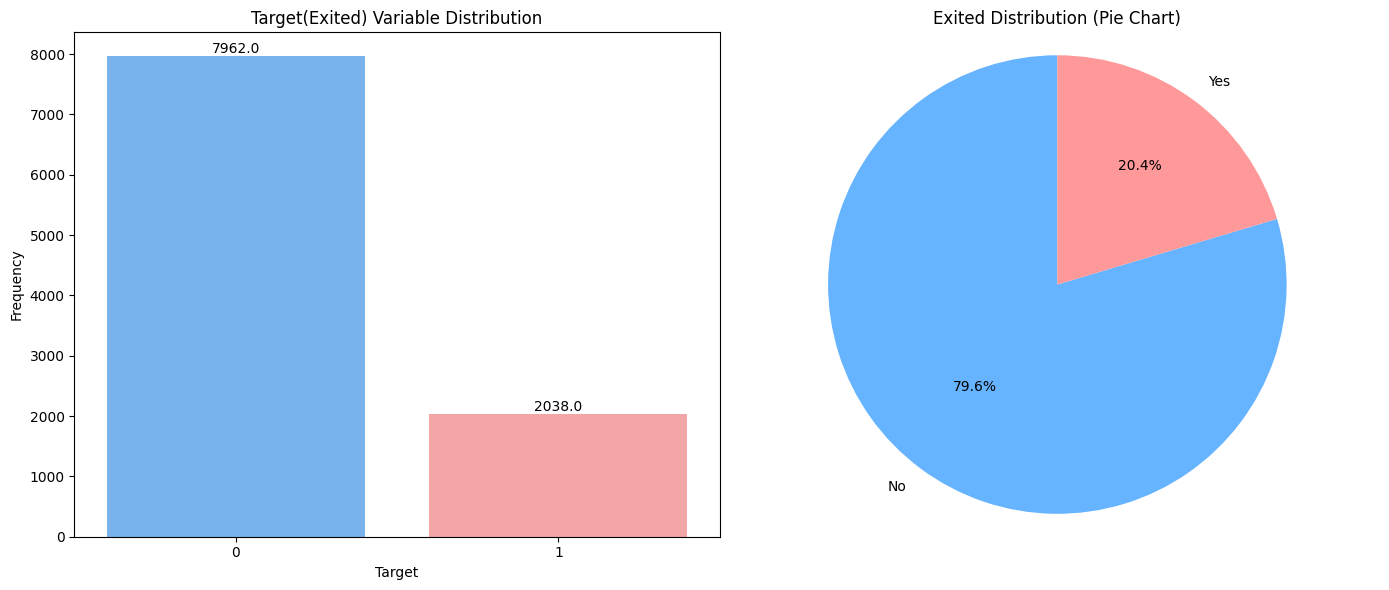

In [65]:
## Prepare data
counts = df['exited'].value_counts()
sizes = counts.values
colors = ['#66b3ff', '#ff9999']
total = sum(sizes)

## create subpl;ots 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

## creating barchart
sns.countplot(x='exited', data=df, palette=colors, ax=ax1)
ax1.set_title("Target(Exited) Variable Distribution")
ax1.set_xlabel("Target")
ax1.set_ylabel("Frequency")

## add count lables on the top of the bars
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=10)



## create pie chart

ax2.pie(sizes, labels=['No','Yes'],
        autopct=lambda pct: f"{pct:.1f}%\n",
        startangle=90,
        colors=colors[:len(sizes)])
ax2.set_title("Exited Distribution (Pie Chart)")
ax2.axis('equal')

# Display the plots
plt.tight_layout()
plt.show()

#### From the above chart we can firmly confirm that the data is unbalacnced. Where minority of the people are not leaving. This might create a biasness during downstream analysis and Machine Learning Outcome.
### Also we can see 20.4% of people are leaving our bank which is huge blow for the company. We need to dive deeper and try to find what is the reason and try to retain users.


#### Lets check what percentage of people leaving our company have what credit score. so we can see if people with actually good credit are leaving or not.

#### Gender distribution

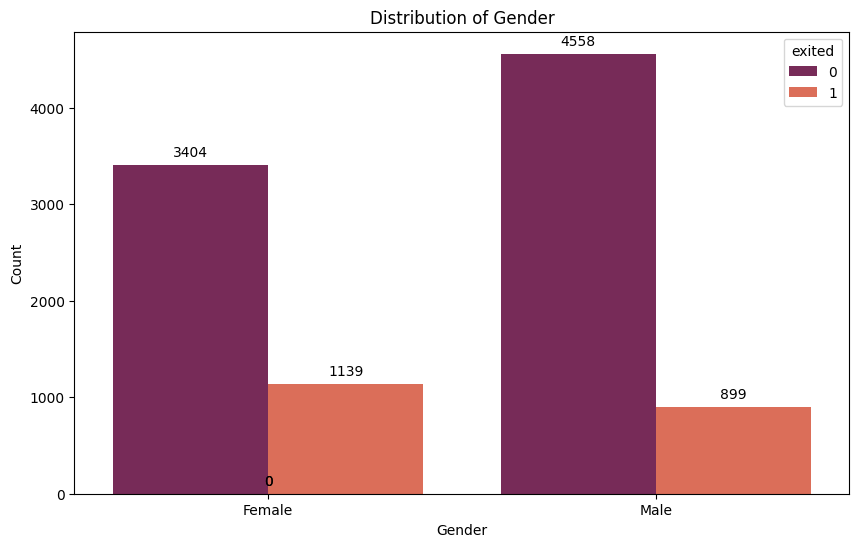

In [66]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="gender", palette='rocket', hue='exited')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Credit Score

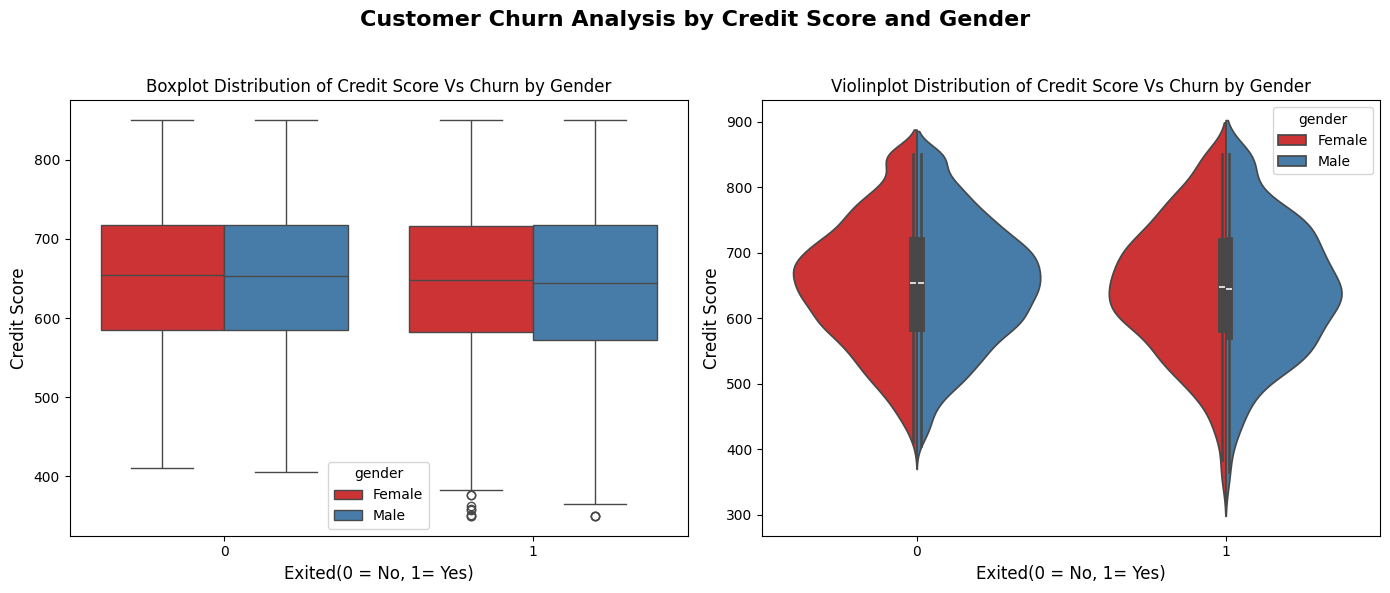

In [67]:
## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))

### creating box plot

sns.boxplot(data= df, x='exited', y="creditscore", hue="gender", ax= ax[0], palette='Set1')
ax[0].set_title("Boxplot Distribution of Credit Score Vs Churn by Gender")
ax[0].set_xlabel("Exited(0 = No, 1= Yes)", fontsize=12)
ax[0].set_ylabel("Credit Score", fontsize=12)
ax[0].legend(title='gender')

## creating violin plot

sns.violinplot(data= df, x='exited', y="creditscore", hue="gender", split=True, ax=ax[1],palette='Set1')
ax[1].set_title("Violinplot Distribution of Credit Score Vs Churn by Gender")
ax[1].set_xlabel("Exited(0 = No, 1= Yes)", fontsize=12)
ax[1].set_ylabel("Credit Score", fontsize=12)
ax[1].legend(title='gender')

# Shared title
plt.suptitle("Customer Churn Analysis by Credit Score and Gender", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### From the above box plot and violin plot we can see that specially female who have low credit score have churn from the bank. The number of low-credit female exitting the bank is higher than males who  have low credit score. However, median of people who churn are almost same. 
### From the violin plot we can see people who churn and non churn are similar. We can conclude that credit score is not a strong factor to determine that credit score is the only sole factor for churn

In [68]:
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## lets see the age distribution of the people

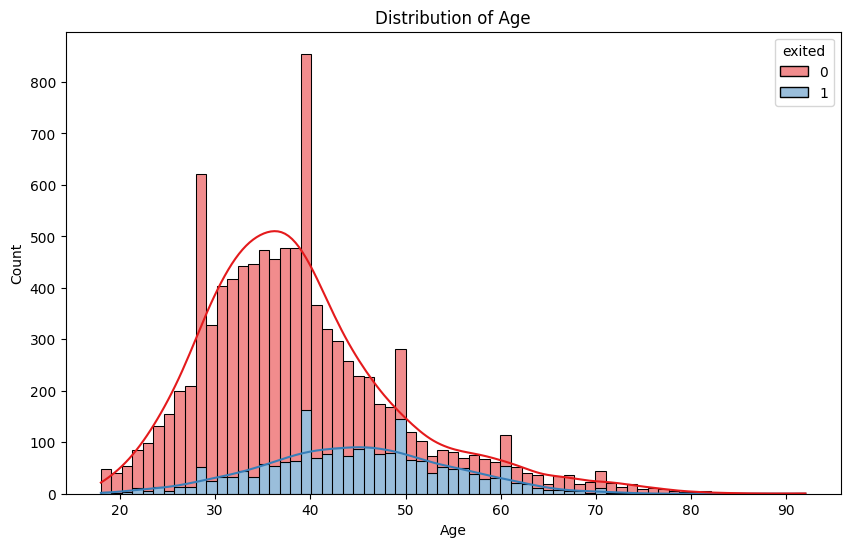

In [69]:
plt.figure(figsize=(10,6))
ax = sns.histplot( data=df,x='age', hue="exited", kde=True, palette='Set1', multiple="stack")  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### The above histogram visualize the age group distribution of the customer who churn and who did not. Most of the customer belong to 30-40 years of age category. 
### We can see from the non-churn category, it is skewed to right meaning we have high number of people from age group 
### Also from the churn category we can see that it is quitely normally distributed. 

### Lets plot a bar graph for the geography. Lets see what are the region people live in

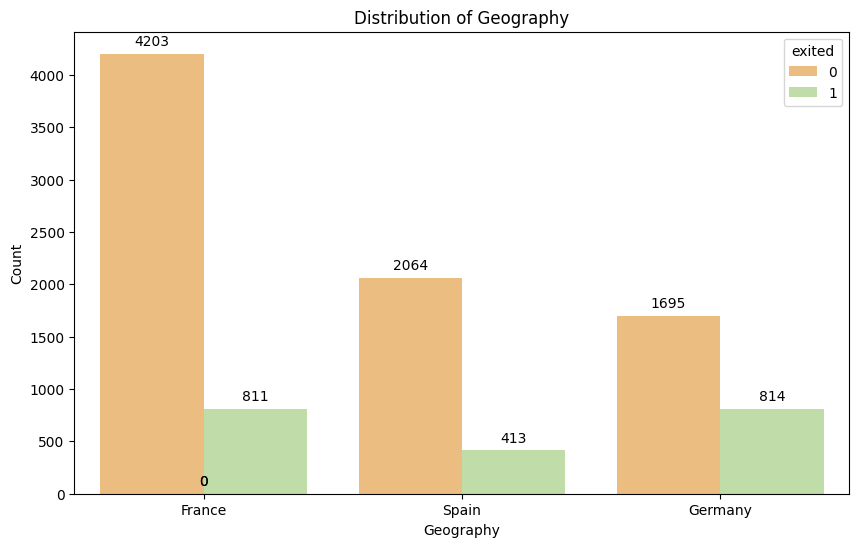

In [70]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="geography", palette='Spectral', hue='exited')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

### From the above graph we can see, number of people exitting more are from germany while the most of the customers are from France who have not exited/churn our bank. Further spain have the lowest churn rate. Also, Germany having less customers have more churn rate which can include various factor like Having Compilance issues, or customer having issues with bank.

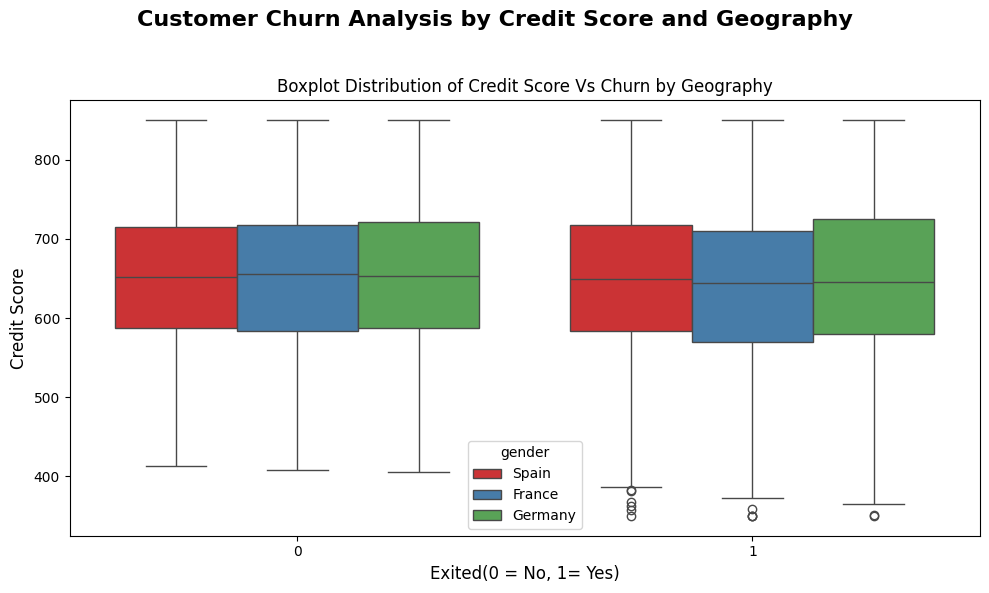

In [71]:
## create subplots for box and violin plot
fig =  plt.figure(figsize=(10, 6))

### creating box plot

ax= sns.boxplot(data= df, x='exited', y="creditscore", hue="geography", palette='Set1')
ax.set_title("Boxplot Distribution of Credit Score Vs Churn by Geography")
ax.set_xlabel("Exited(0 = No, 1= Yes)", fontsize=12)
ax.set_ylabel("Credit Score", fontsize=12)
ax.legend(title='gender')

# Shared title
plt.suptitle("Customer Churn Analysis by Credit Score and Geography", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### From this box plot we can see that people in spain who have churn from our bank have high number of people(outliers) with low credit score. 
### However, from the non churn box plot we can see that Framce have slight high median compared to other country. Suggest that gepgraphy dopes not drastically changed the credit score distrinution. 

## Lets see the distribution of the Balance over the Churn

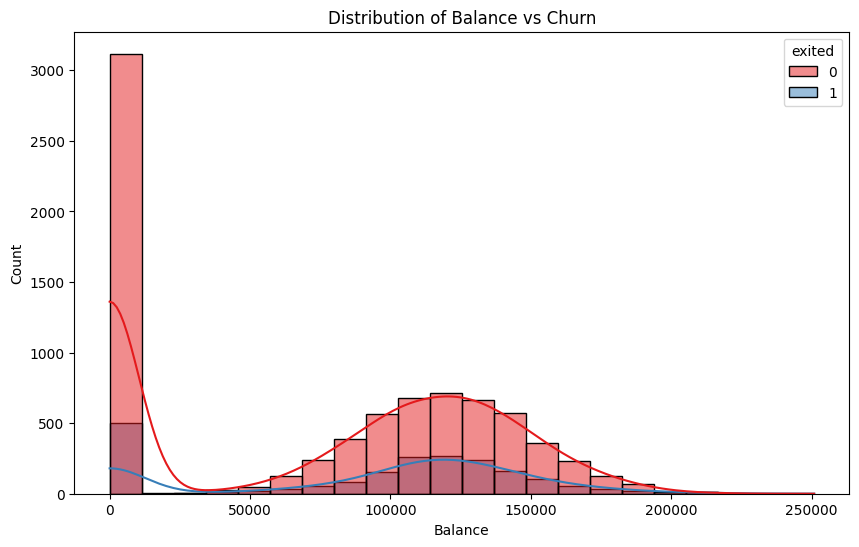

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data =df, x='balance',hue='exited',palette="Set1", kde=True)
plt.title('Distribution of Balance vs Churn')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

### From the above histogram we can see that the people who churn generally have less balance in their account compared to the people who did not. The graph shows huge number of people do have 0 balance in their account. Also, customer who have balance between 100k and 150k are more likely to leave the bank. 

### LEts check the distrbution of tenure over churn

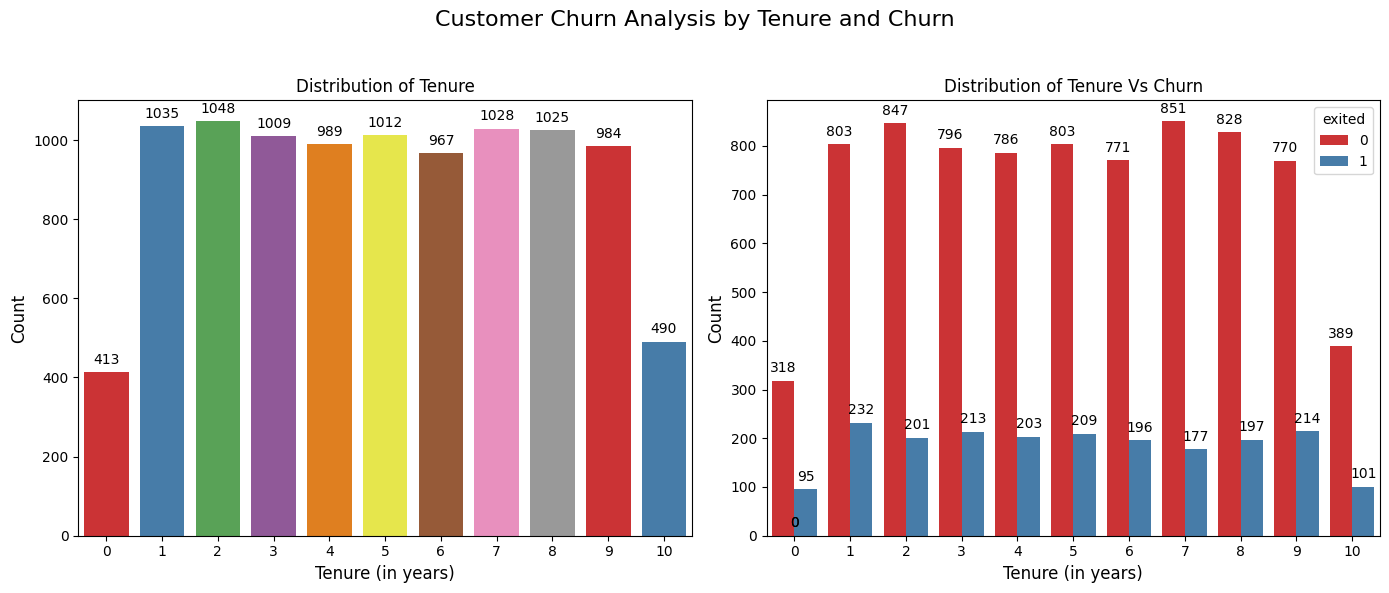

In [73]:
## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))

### creating box plot

sns.countplot(data= df, x='tenure', ax= ax[0], palette='Set1')
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

ax[0].set_title("Distribution of Tenure")
ax[0].set_xlabel("Tenure (in years)", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)

## creating violin plot

sns.countplot(data= df, x='tenure', hue="exited", ax=ax[1],palette='Set1')
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[1].set_title("Distribution of Tenure Vs Churn")
ax[1].set_xlabel("Tenure (in years)", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)

# Shared title
plt.suptitle("Customer Churn Analysis by Tenure and Churn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Tenure referes to the time in years that customer have been with a client with the bank. From the left chart we can see it ranges from 0-10. 0 means first year and 10 means a decade. We can firmly say that new customers are less in number than old customers. While customer who are 2 year in with the bank are higher than any other year. 
### If we have a glance on the right side of the graph, we can see tenure distribution based on churn. We can see 232 people left the bank within the first year while we have high number of loyal customer in the bank. 

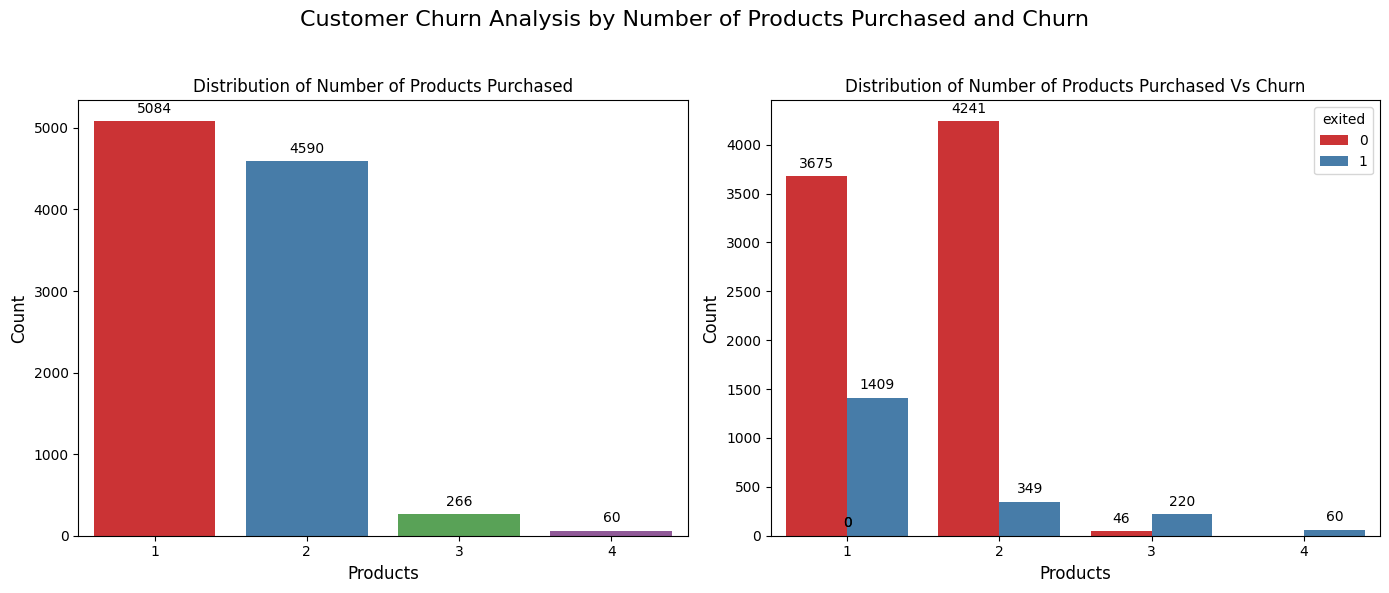

In [74]:
## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))

### creating box plot

sns.countplot(data= df, x='numofproducts', ax= ax[0], palette='Set1')
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

ax[0].set_title("Distribution of Number of Products Purchased")
ax[0].set_xlabel("Products", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)

## creating violin plot

sns.countplot(data= df, x='numofproducts', hue="exited", ax=ax[1],palette='Set1')
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[1].set_title("Distribution of Number of Products Purchased Vs Churn")
ax[1].set_xlabel("Products", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)

# Shared title
plt.suptitle("Customer Churn Analysis by Number of Products Purchased and Churn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### The number of products refers to the bank products like accounts, loans, credit cards, mortgage. We can see people using product 1 are higher as they might only have 1 service from the baank following by product 2 where they are getting 2 different services while product 4 is less among all which suggest we have few number of loyal/deep clients who have multiple services from the bank. 
#### Also, the number of people who churn with only having one product is higher. Which seems that customer do not have deep connection/ties with the bank. They can easily switch with other banks. More products like 3-4 means customers are highly engaged/tied with the bank services. Generally we can assume them as having deep relation with bank and usually less likely to churn. However, the chart reveals an opposite trends. Customers with 2 products have less churn than customer with 3 or 4. 

### Lets see the active members who churn and who did not churn


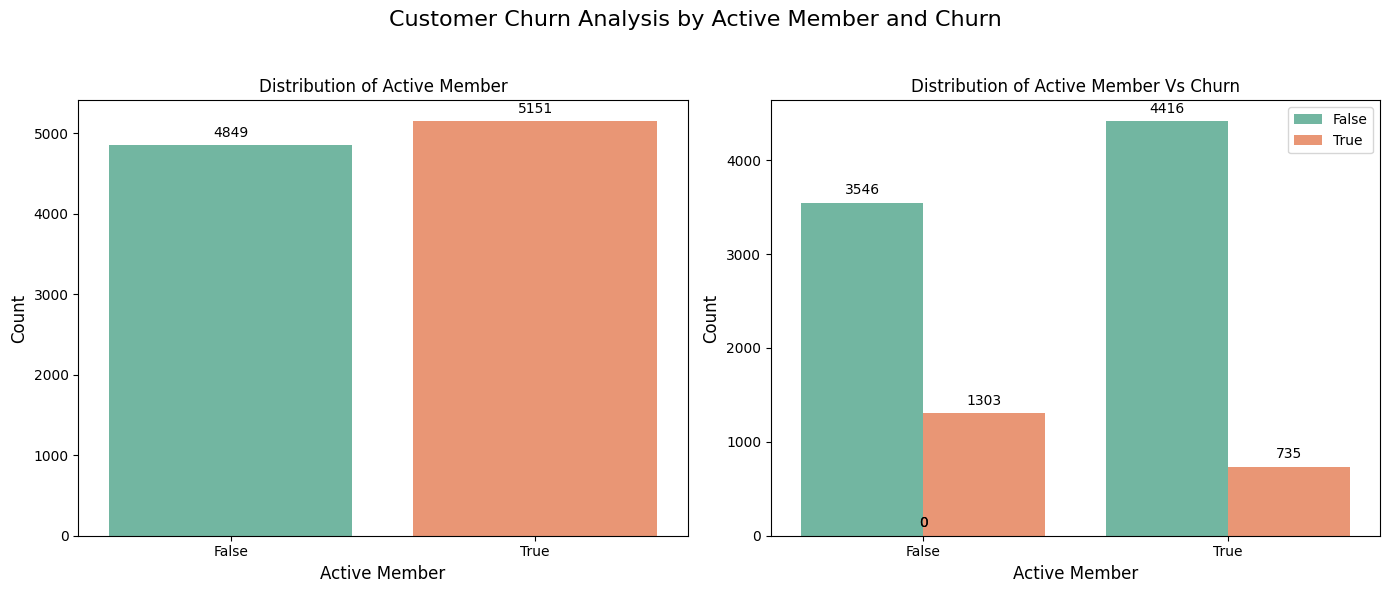

In [75]:
## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))
### creating box plot

sns.countplot(data= df, x='isactivemember', ax= ax[0], palette='Set2')
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[0].set_xticklabels(['False', "True"])
ax[0].set_title("Distribution of Active Member")
ax[0].set_xlabel("Active Member", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)

## creating violin plot

sns.countplot(data= df, x='isactivemember', hue="exited", ax=ax[1],palette='Set2')
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[1].set_title("Distribution of Active Member Vs Churn")
ax[1].set_xlabel("Active Member", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
ax[1].set_xticklabels(['False', "True"])
ax[1].legend(['False', 'True'])
# Shared title
plt.suptitle("Customer Churn Analysis by Active Member and Churn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### From the above chart we can see that we have higher number of active user. Meaning that they have some business with the bank and continuously interacting with the bank. From the right side we can see people who are activemember has churn less then people who are not active. 

### Lets chcek the distribution of card_type with churn

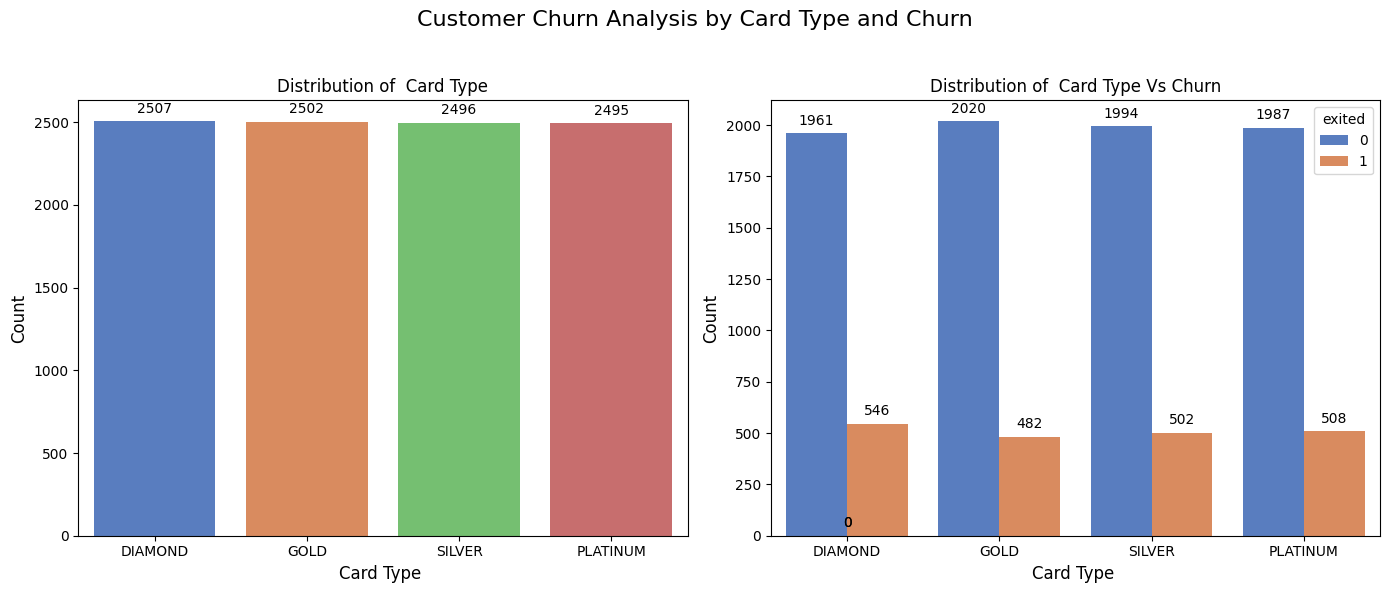

In [76]:

## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))
### creating box plot

sns.countplot(data= df, x='card_type', ax= ax[0], palette='muted')
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[0].set_title("Distribution of  Card Type")
ax[0].set_xlabel("Card Type ", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)

## creating violin plot

sns.countplot(data= df, x='card_type', hue="exited", ax=ax[1],palette='muted')
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[1].set_title("Distribution of  Card Type Vs Churn")
ax[1].set_xlabel("Card Type ", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
# Shared title
plt.suptitle("Customer Churn Analysis by Card Type and Churn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Lets check the distribution of satisfaction score vs people who churn

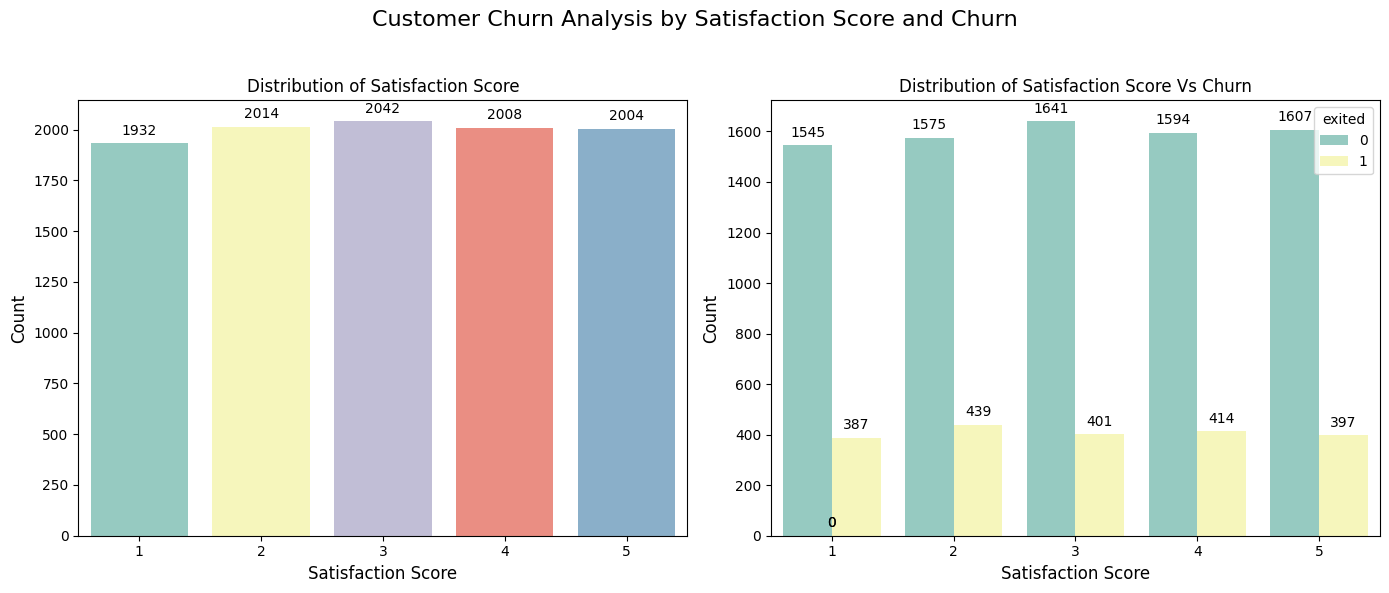

In [77]:
## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))
### creating box plot

sns.countplot(data= df, x='satisfaction_score', ax= ax[0], palette='Set3')
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[0].set_title("Distribution of Satisfaction Score")
ax[0].set_xlabel("Satisfaction Score", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)

## creating violin plot

sns.countplot(data= df, x='satisfaction_score', hue="exited", ax=ax[1],palette='Set3')
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
ax[1].set_title("Distribution of Satisfaction Score Vs Churn")
ax[1].set_xlabel("Satisfaction Score", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
# Shared title
plt.suptitle("Customer Churn Analysis by Satisfaction Score and Churn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### lets see the trend of  churn by age group

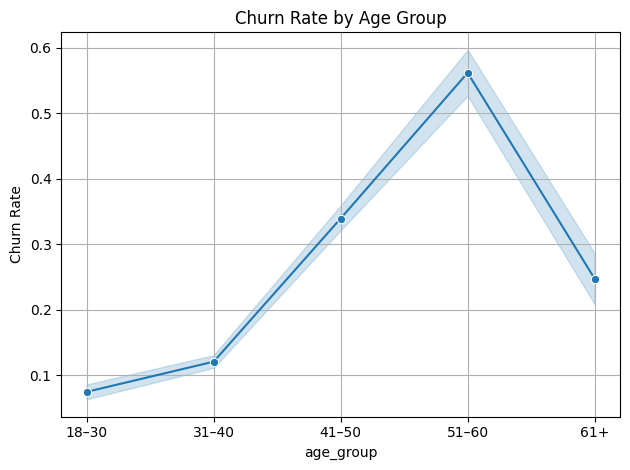

In [78]:
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100],
                         labels=['18–30', '31–40', '41–50', '51–60', '61+'])

age_churn = df.groupby('age_group')['exited'].mean().reset_index
sns.lineplot(data = df, x='age_group', y='exited',marker='o')
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


### lets see the trend of  churn by tenure

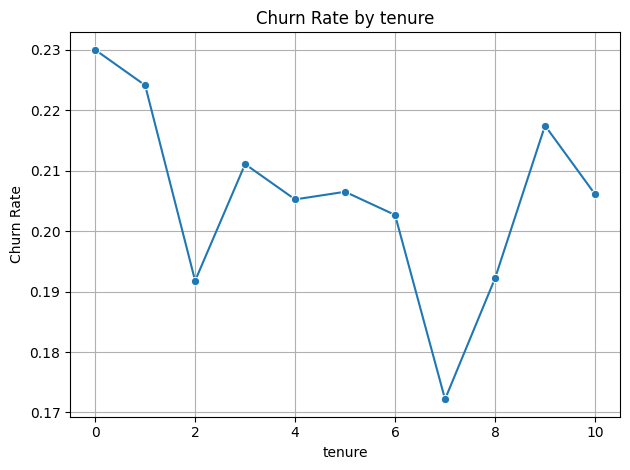

In [79]:
tenure_churn = df.groupby('tenure')['exited'].mean().reset_index()
sns.lineplot(data = tenure_churn, x='tenure', y='exited',marker='o')
plt.title("Churn Rate by tenure")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

### lets see the trend of  churn by satisfaction_score

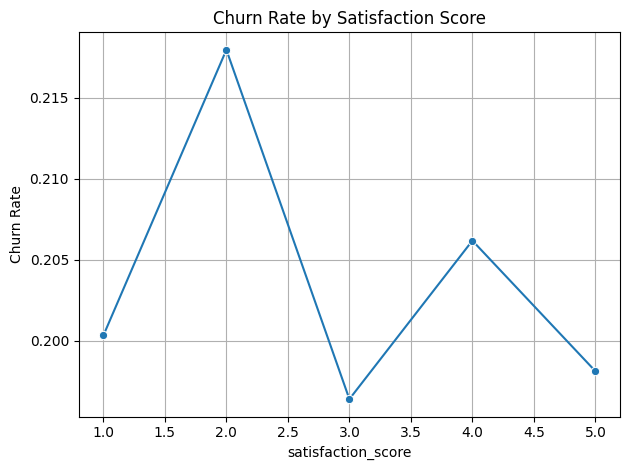

In [80]:
satisfaction_churn = df.groupby('satisfaction_score')['exited'].mean().reset_index()
sns.lineplot(data = satisfaction_churn, x='satisfaction_score', y='exited',marker='o')
plt.title("Churn Rate by Satisfaction Score")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

## lets build a correlation table 

In [81]:
# Compute correlation again
correlation = df.corr(numeric_only=True)
print(correlation['exited'].sort_values(ascending=False), '\n')

exited                1.000000
complain              0.995693
age                   0.285296
balance               0.118577
estimatedsalary       0.012490
point_earned         -0.004628
satisfaction_score   -0.005849
hascrcard            -0.006976
tenure               -0.013656
creditscore          -0.026771
numofproducts        -0.047611
isactivemember       -0.156356
Name: exited, dtype: float64 



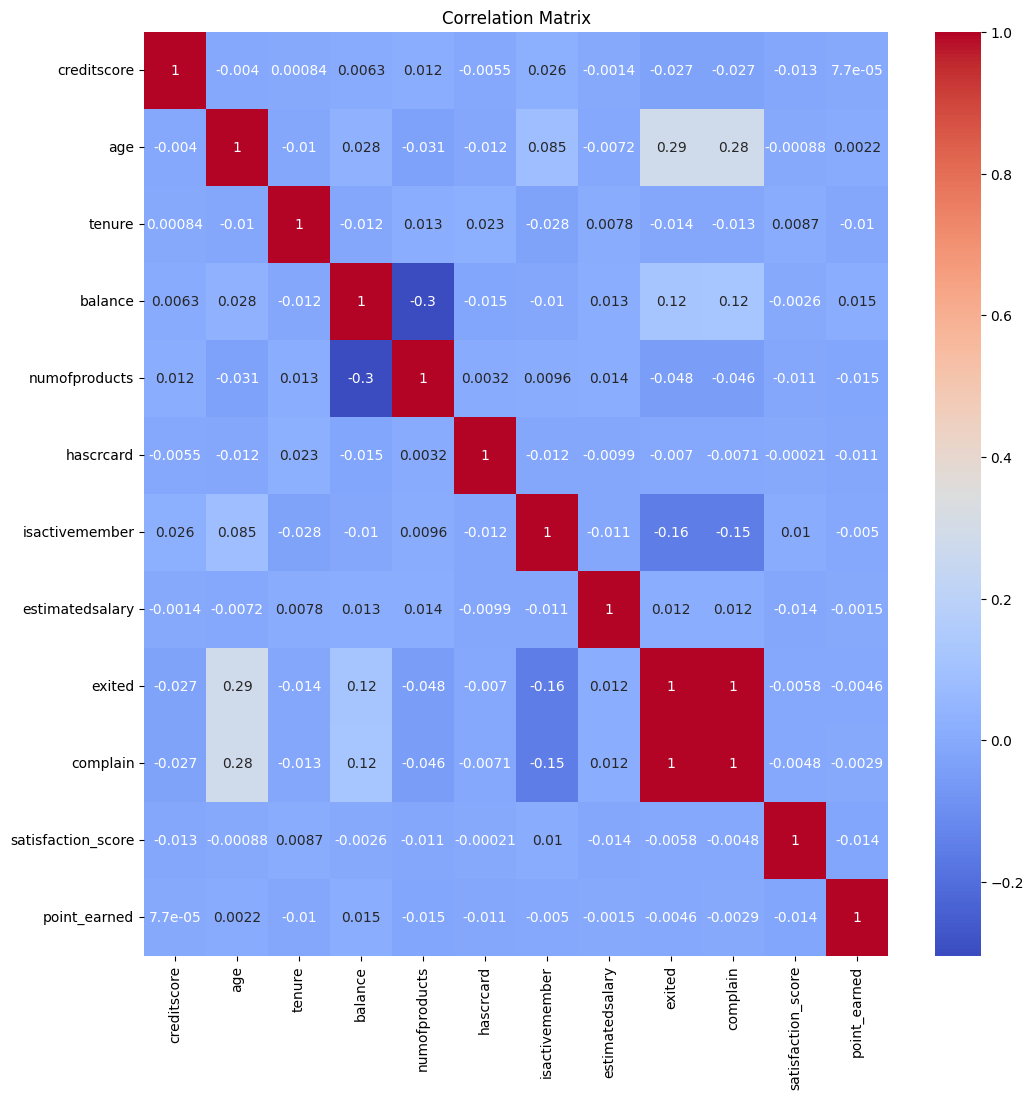

In [82]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>Data Pre-processing</center></h1>

### Based on the above insights, the preprocessing will be done by using Encoding Categorical Variables. 
#### Convert Geography, gender, card_type, products, satisfaction score into one hot encoding

In [83]:
df.nunique()

surname               2932
creditscore            460
geography                3
gender                   2
age                     70
tenure                  11
balance               6382
numofproducts            4
hascrcard                2
isactivemember           2
estimatedsalary       9999
exited                   2
complain                 2
satisfaction_score       5
card_type                4
point_earned           785
age_group                5
dtype: int64

In [84]:
categorical_features

['surname', 'geography', 'gender', 'card_type']

In [85]:
numerical_features

['creditscore',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited',
 'complain',
 'satisfaction_score',
 'point_earned']

In [86]:
df = df.drop(['surname', 'age'], axis=1)

In [87]:
df.head()

,creditscore,geography,gender,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned,age_group
0,619,France,Female,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41–50
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41–50
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41–50
3,699,France,Female,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,31–40
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,41–50


In [88]:
df_encoded = pd.get_dummies(df, columns=['geography', 'gender', 'card_type', 'tenure', 'numofproducts', 'hascrcard', 'isactivemember','complain', 'satisfaction_score','age_group' ], drop_first=True)

In [89]:
df_encoded.head()

,creditscore,balance,estimatedsalary,exited,point_earned,geography_Germany,geography_Spain,gender_Male,card_type_GOLD,card_type_PLATINUM,...,isactivemember_1,complain_1,satisfaction_score_2,satisfaction_score_3,satisfaction_score_4,satisfaction_score_5,age_group_31–40,age_group_41–50,age_group_51–60,age_group_61+
0,619,0.00,101348.88,1,464,False,False,False,False,False,...,True,True,True,False,False,False,False,True,False,False
1,608,83807.86,112542.58,0,456,False,True,False,False,False,...,True,True,False,True,False,False,False,True,False,False
2,502,159660.80,113931.57,1,377,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,699,0.00,93826.63,0,350,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
4,850,125510.82,79084.10,0,425,False,True,False,True,False,...,True,False,False,False,False,True,False,True,False,False


<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>Machine Learning</center></h1>

In [90]:
### Separate features (X) and target variable (y)
X = df_encoded.drop('exited', axis=1)
y = df_encoded['exited']

## splitting training and testing   

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### PRINCIPAL COMPONENT ANALYSIS

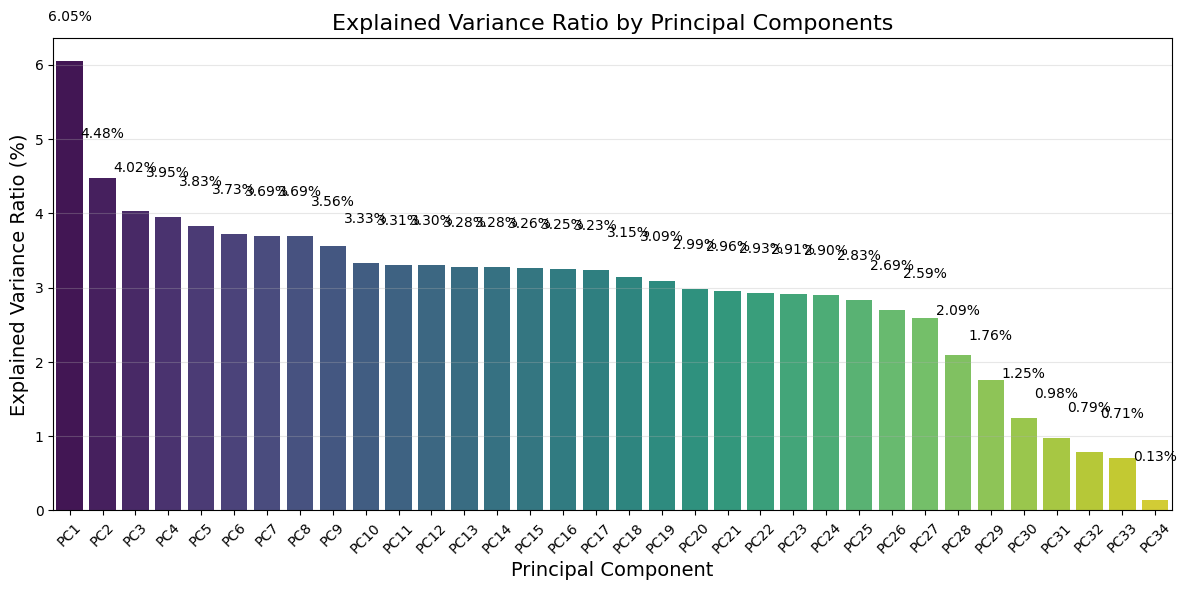

In [92]:
from sklearn.decomposition import PCA
X_encoded = X.copy()
label_encoders = {}

# Label Encoding
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_encoded)

# PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
# Create DataFrame for plotting
pc_labels = [f'PC{i+1}' for i in range(len(explained_variance_ratio))]
explained_variance_data = pd.DataFrame({
    'Principal Component': pc_labels,
    'Explained Variance Ratio': explained_variance_ratio * 100  # in percentage
})
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Principal Component', y='Explained Variance Ratio',
            data=explained_variance_data, palette='viridis')

# Add percentage labels on top of each bar
for i, val in enumerate(explained_variance_data['Explained Variance Ratio']):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', va='bottom', fontsize=10)

# Enhance labels and aesthetics
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Explained variance indicate the amouunt of the variance captured by single Principle component. 
### The higher the explained variance, the higher will be the information contained in those components. 
### We can see our first 7 Principal Components has high variance wehich means they are more important for machine learning

# Scaling the numerical features

In [113]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 8px; color:black'><center>Base Model</center></h1>

### Lets create a reusable function to run our models

In [125]:
def train_and_eval_model(model, model_name,sampler= None, hyperparameter = None, param_grid = None, test_size = 0.33, random_state = 42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=test_size,random_state=random_state)
    if sampler: ## if we pass sampler to perform some minority/majority sampling method
        pass
    if param_grid:## if we pass param grid 
        pass
    if hyperparameter: ## if we pass hyperparameter to perfrom hyper parameterization
        pass
    
    
    ## train the model
    model.fit(X_train, y_train)
    print("Trained Model:", model_name)    
    
    ## make the predictions on the test sets
    y_pred = model.predict(X_test)
    
    ## evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test,y_pred, output_dict=True)
    confusion_matric = confusion_matrix(y_test, y_pred)    
    
    ## returinng all the results form the model in an dictionary
    results = {
        'model_name': model_name,
        'accuracy' : accuracy, 
        'classification_report' : classification_report,
        'confusion_matrix' : confusion_matrix
    }
    
    return results 

In [127]:
log_reg_model = LogisticRegression(max_iter=1000)
train_and_eval_model(model=log_reg_model, model_name="Logistic Regression")

Trained Model: Logistic Regression


{'model_name': 'Logistic Regression',
 'accuracy': 0.9987878787878788,
 'classification_report': <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 'confusion_matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>}

## Logistic Regression MODEL

In [95]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
# Predictions and Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9986666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



## Creating Confusion Matrix

In [98]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

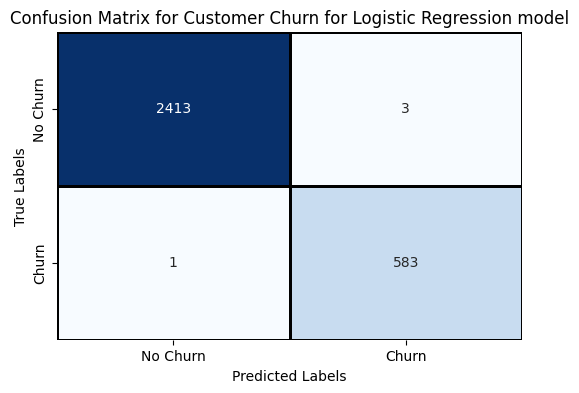

In [102]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], 
            linewidths=1, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Customer Churn for Logistic Regression model')
plt.show()

### The dataset appears to be imbalanced, with significantly more non-churn customers (2416) than churned ones (584). This could potentially bias the model towards predicting non-churn more often.

### Model Tuining and Optimization